# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Read CSV Files

In [5]:
DS_no_outliers = pd.read_csv("../Dataset_without_outliers.csv")
DS_SMOTE = pd.read_csv("../Dataset_SMOTE_BC.csv")
DS_SMOTE_WithOutliers = pd.read_csv("../Data_with_SMOTE.csv")

# Split Into X and Y

In [6]:
X_NoOutliers = DS_no_outliers.iloc[:,0:21]
Y_NoOutliers = DS_no_outliers.iloc[:,-1]

X_SMOTE = DS_SMOTE.iloc[:,0:21]
X_SMOTE_IMPORTANT_FEATURES = X_SMOTE[["baseline value", "accelerations", "uterine_contractions", "prolongued_decelerations", "abnormal_short_term_variability", "mean_value_of_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability", "histogram_mode", "histogram_mean", "histogram_median"]]
Y_SMOTE_MC = DS_SMOTE.iloc[:,-2]
Y_SMOTE_BC = DS_SMOTE.iloc[:,-1]

X_SMOTE_WithOutliers = DS_SMOTE_WithOutliers.iloc[:,0:21]
Y_SMOTE_WithOutliers = DS_SMOTE_WithOutliers.iloc[:,-1]

# Split Into Test/Train

In [7]:
X_NO_train, X_NO_test, Y_NO_train, Y_NO_test = train_test_split(X_NoOutliers, Y_NoOutliers, test_size=0.3, random_state=0)
X_SMOTE_MC_train, X_SMOTE_MC_test, Y_SMOTE_MC_train, Y_SMOTE_MC_test = train_test_split(X_SMOTE, Y_SMOTE_MC, test_size=0.3, random_state=0)
X_SMOTE_BC_train, X_SMOTE_BC_test, Y_SMOTE_BC_train, Y_SMOTE_BC_test = train_test_split(X_SMOTE, Y_SMOTE_BC, test_size=0.3, random_state=0)
X_SMOTE_MCIF_train, X_SMOTE_MCIF_test, Y_SMOTE_MCIF_train, Y_SMOTE_MCIF_test = train_test_split(X_SMOTE_IMPORTANT_FEATURES, Y_SMOTE_MC, test_size=0.3, random_state=0)
X_SMOTE_BCIF_train, X_SMOTE_BCIF_test, Y_SMOTE_BCIF_train, Y_SMOTE_BCIF_test = train_test_split(X_SMOTE_IMPORTANT_FEATURES, Y_SMOTE_BC, test_size=0.3, random_state=0)
X_SMOTE_WithOutliers_train, X_SMOTE_WithOutliers_test, Y_SMOTE_WithOutliers_train, Y_SMOTE_WithOutliers_test = train_test_split(X_SMOTE_WithOutliers, Y_SMOTE_WithOutliers, test_size=0.3, random_state=0)


# Scale Data

In [8]:
scaler = StandardScaler()

scaler.fit(X_SMOTE_MC_train)
X_SMOTE_MC_train = scaler.transform(X_SMOTE_MC_train)
X_SMOTE_MC_test = scaler.transform(X_SMOTE_MC_test)

scaler.fit(X_SMOTE_BC_train)
X_SMOTE_BC_train = scaler.transform(X_SMOTE_BC_train)
X_SMOTE_BC_test = scaler.transform(X_SMOTE_BC_test)

scaler.fit(X_SMOTE_MCIF_train)
X_SMOTE_MCIF_train = scaler.transform(X_SMOTE_MCIF_train)
X_SMOTE_MCIF_test = scaler.transform(X_SMOTE_MCIF_test)

scaler.fit(X_SMOTE_BCIF_train)
X_SMOTE_BCIF_train = scaler.transform(X_SMOTE_BCIF_train)
X_SMOTE_BCIF_test = scaler.transform(X_SMOTE_BCIF_test)

scaler.fit(X_SMOTE_WithOutliers_train)
X_SMOTE_WithOutliers_train = scaler.transform(X_SMOTE_WithOutliers_train)
X_SMOTE_WithOutliers_test = scaler.transform(X_SMOTE_WithOutliers_test)

# Create Models

In [9]:
ANN_NoOutliers = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(5,2), random_state=1)
ANN_SMOTE_MC = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(10,3), random_state=1, max_iter=1000)
ANN_SMOTE_BC = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(10,3), random_state=1, max_iter=1000)
ANN_SMOTE_MCIF = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(10,3), random_state=1, max_iter=1000)
ANN_SMOTE_BCIF = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(10,3), random_state=1, max_iter=1000)
ANN_SMOTE_WithOutliers = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(10,3), random_state=1, max_iter=1000)

# Train on data with no oversampling

In [10]:
ANN_SMOTE_MC.fit(X_SMOTE_MC_train, Y_SMOTE_MC_train)
ANN_SMOTE_BC.fit(X_SMOTE_BC_train, Y_SMOTE_BC_train)
ANN_SMOTE_MCIF.fit(X_SMOTE_MCIF_train, Y_SMOTE_MCIF_train)
ANN_SMOTE_BCIF.fit(X_SMOTE_BCIF_train, Y_SMOTE_BCIF_train)
ANN_SMOTE_WithOutliers.fit(X_SMOTE_WithOutliers_train, Y_SMOTE_WithOutliers_train)

MLPClassifier(hidden_layer_sizes=(10, 3), max_iter=1000, random_state=1)

# Make Predictions with on test data

In [11]:
SMOTE_MC_predictions = ANN_SMOTE_MC.predict(X_SMOTE_MC_test)
SMOTE_BC_predictions = ANN_SMOTE_BC.predict(X_SMOTE_BC_test)
#SMOTE_MCIF_predictions = ANN_SMOTE_MCIF.predict(X_SMOTE_MCIF_test)
#SMOTE_BCIF_predictions = ANN_SMOTE_BCIF.predict(X_SMOTE_BCIF_test)
#SMOTE_WithOutliers_predictions = ANN_SMOTE_WithOutliers.predict(X_SMOTE_WithOutliers_test)

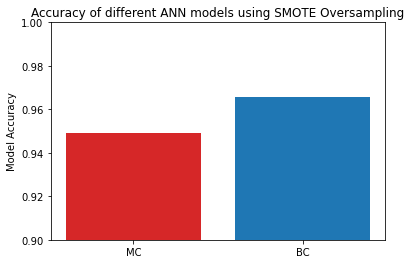

In [13]:
SMOTE_MC_acc = accuracy_score(SMOTE_MC_predictions, Y_SMOTE_MC_test)
SMOTE_BC_acc = accuracy_score(SMOTE_BC_predictions, Y_SMOTE_BC_test)
#SMOTE_MCIF_acc = accuracy_score(SMOTE_MCIF_predictions, Y_SMOTE_MCIF_test)
#SMOTE_BCIF_acc = accuracy_score(SMOTE_BCIF_predictions, Y_SMOTE_BCIF_test)
#SMOTE_WithOutliers_acc = accuracy_score(SMOTE_WithOutliers_predictions, Y_SMOTE_WithOutliers_test)

fig, ax = plt.subplots()

bar_names = ['MC', 'BC']
accuracies = [SMOTE_MC_acc, SMOTE_BC_acc]
bar_labels = ['Multiclass', 'Binary Class']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(bar_names, accuracies, label=bar_labels, color=bar_colors)

ax.set_ylabel("Model Accuracy")
ax.set_title("Accuracy of different ANN models using SMOTE Oversampling")
plt.ylim(.9,1.0)


plt.show()
